In [ ]:
#1 - clustering bc you can cluster similar groups
#2 - supervised learning
#3 - secondary data set that tests a learning program after it trained an initial set

In [41]:
import boto3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'data445-ashlyn-bucket'
bucket = s3.Bucket(bucket_name)

## defining the csv file
file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## reading the csv file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [29]:
## dropping the no column
house_price = house_price.drop(columns = ['No', 'transaction_date'], axis = 1)

In [30]:
from sklearn.model_selection import train_test_split

## defining the input and target variables
X = house_price.drop(columns = ['house_price_of_unit_area'], axis = 1)
Y = house_price['house_price_of_unit_area']

## splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## building the linear model
from sklearn.linear_model import LinearRegression

lm_md1 = LinearRegression().fit(X_train, Y_train)
lm_md1.coef_

array([-2.75245493e-01, -4.29189432e-03,  1.20181113e+00,  2.60799700e+02,
       -2.50127027e+01])

In [31]:
## predicting on test
preds1 = lm_md1.predict(X_test)
preds1

array([44.79023046, 32.31819255, 41.95623188, 46.69028615, 42.02370942,
       12.97854812, 42.30654613, 30.82182397, 34.82598618, 46.04540989,
       42.38534738, 48.72094858, 31.0883582 , 31.23822387, 46.52513885,
       46.12798354, 14.11103715, 54.12209795, 34.79846164, 48.03992062,
       44.19968489, 35.74744254, 32.290668  , 37.33434823, 38.87264423,
       40.04480693, 29.63698045, 37.32695535, 50.52741737, 50.46584928,
       47.91557026, 36.07182731, 33.58424453, 14.90924908, 33.87718891,
       49.96602321, 43.08627347, 40.5416606 , 32.74890037, 39.34283005,
       49.52877262, 43.95329164, 52.69597827, 47.97061936, 42.38534738,
       45.45790076, 39.79363546, 30.98149805, 34.28367823, 48.25283113,
       39.82461005, 52.59760282, 33.76148654, 48.7342095 , 33.84886684,
       11.59384152, 38.56677284, 44.66767345, 40.37898719, 49.98325634,
       38.61380976, 30.19414786, 32.2824188 , 39.55362201, 55.61600885,
       34.85351073, 14.44724483,  2.61529616, 43.1596103 , 36.27

In [32]:
## computing the mse
mse1 = np.mean(np.power(preds1 - Y_test, 2))
mse1

92.43272997021538

In [33]:
## defining the input and target variables
X_new_train = X_train.drop(columns = ['distance_to_the_nearest_MRT_station'],axis = 1)
X_new_test = X_test.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)

In [34]:
## linear model
lm_md2 = LinearRegression().fit(X_new_train, Y_train)

#predicting on test
preds_2 = lm_md2.predict(X_new_test)

#mse
mse_2 = np.mean(np.power(preds_2 - Y_test, 2))

In [35]:
## computing the mse
mse = np.mean(np.power(preds - Y_test, 2))
mse

255.4996406436627

In [ ]:
#we would choose the first mse model

In [37]:
from sklearn.model_selection import LeaveOneOut

#list
md1_result = []
md2_result = []

for i in range(0,100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

    X_new_train = X_train.drop(columns = ['distance_to_the_nearest_MRT_station'], axis =1)
    X_new_test = X_test.drop(columns = ['distance_to_the_nearest_MRT_station'], axis =1)
    
    md1 = LinearRegression().fit(X_train, Y_train)
    pred1 = md1.predict(X_test)
    mse1 = np.mean(np.power(pred1 - Y_test, 2))
    md1_result.append(mse1)
md1_result
   
    

[118.82587042974814,
 141.0886094490433,
 137.1099518013735,
 67.31240042421982,
 138.86566020470602,
 78.93875802766168,
 69.72503758699307,
 73.06093960109473,
 72.12383602289715,
 74.02593005678776,
 53.61096169365116,
 90.91576034726957,
 138.03189195140774,
 49.49610415990957,
 132.29664069671404,
 54.94367953503847,
 94.23074172599898,
 39.63312583679477,
 154.66738110042402,
 54.472424309272476,
 139.56120095431962,
 71.5823293188055,
 85.30871911904387,
 132.1086800948192,
 74.7660922428192,
 94.48606343260045,
 56.9224691920799,
 82.79561664006812,
 70.98973046524318,
 61.55624625834112,
 58.000037448568705,
 73.62617370387129,
 56.55075612640728,
 71.43401190591766,
 53.07459839702847,
 74.04889281032867,
 74.49065303249994,
 134.4277971069606,
 87.09765742727403,
 61.70532838965161,
 58.96715322616201,
 61.0805073546695,
 46.163448314532424,
 96.41176407722259,
 59.58472193626433,
 57.70180811677184,
 138.83118527956753,
 71.7079281739623,
 46.88823619201399,
 63.74801885915

In [39]:
    md2 = LinearRegression().fit(X_new_train, Y_train)
    pred2 = md2.predict(X_new_test)
    mse2 = np.mean(np.power(pred2 - Y_test, 2))
    md2_result.append(mse2)
    
md2_result

[78.41405081224426]

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

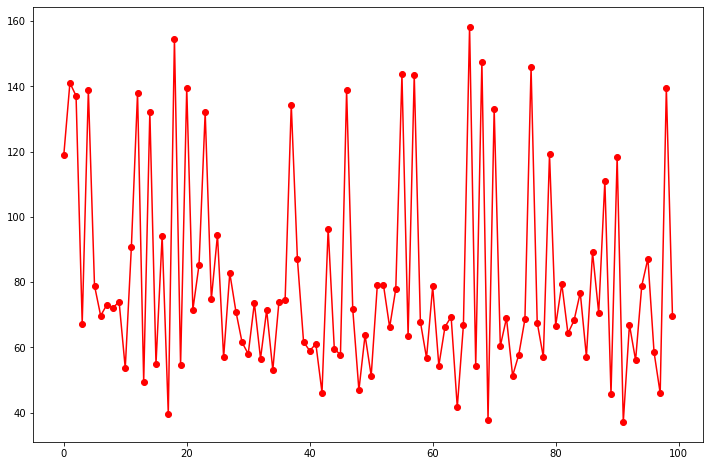

In [45]:
fig = plt.figure(figsize = (12, 8))

iterations = range(0, 100)
plt.plot(iterations, md1_result, marker = 'o', color = 'red', label = 'Model (d)')
plt.plot(iterations, md2_result, marker = 'o', color = 'blue', label = 'Model (e)')

plt.xlabel('Number of Iteration')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()
